In [1]:
# Importando as Bibliotecas Básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Importando a Biblioteca do KNN
from sklearn.neighbors import KNeighborsClassifier
# Importando a Biblioteca de Acurácia, Matriz de Confusão (em quantos jogos entrou em quantos foi green ou red)
from sklearn.metrics import accuracy_score, confusion_matrix
# Importando a Biblioteca SkLearn para padronizar os dados (entre 0 e 1)
from sklearn.preprocessing import StandardScaler
# Importando a Biblioteca SkLearn para dividir os dados entre treinamento e teste
from sklearn.model_selection import train_test_split

In [2]:
# Importando os DataFrames
df0 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/x_FutPythonTrader_Base_de_Dados_Temporadas_Passadas_x.xlsx?raw=true')
df = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/x_FutPythonTrader_Base_de_Dados_Temporada_Atual_x.xlsx?raw=true')

df0 = df0[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','FT_Goals_H','FT_Goals_A']]

In [3]:
df0['FT_Total_Goals'] = df0.apply(lambda row: (row['FT_Goals_H'] + row['FT_Goals_A']), axis=1) 
df0['FT_Over05'] = df0.apply(lambda row: 1 if (row['FT_Total_Goals'] > 0) else 0, axis=1) 

In [4]:
df = df0[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','FT_Over05']]

In [5]:
# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df.loc[(df['FT_Over05'] > 0), 'Over05'] = 1
df.loc[(df['FT_Over05'] < 1), 'Over05'] = 0

In [6]:
df.head()

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over05,FT_Odds_Over15,FT_Odds_Over25,FT_Odds_BTTS_Yes,FT_Over05,Over05
0,Vélez Sarsfield,Newell's Old Boys,2.10,3.00,3.85,1.09,1.49,2.50,2.25,1,1.0
1,Tigre,San Lorenzo,2.45,3.05,3.00,1.09,1.50,2.50,2.20,1,1.0
2,Gimnasia La Plata,Argentinos Juniors,2.60,2.95,2.90,1.09,1.50,2.50,2.20,1,1.0
3,Unión Santa Fe,Aldosivi,1.74,3.50,5.00,1.08,1.48,2.45,2.40,1,1.0
4,Patronato,Colón,2.65,3.00,2.85,1.09,1.51,2.55,2.20,0,0.0


In [7]:
df1 = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','Over05']]
df2 = df[['FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','Over05']]

In [8]:
df1 = df1.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df1_x = df1.iloc[:,0:10].values

# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste = train_test_split(df1_x, test_size=0.20, random_state = 0)

df1 = pd.DataFrame(x_dados_teste)
df1.columns = ['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','Over05']

In [9]:
df2 = df2.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df2_x = df2.iloc[:,0:7].values
df2_y = df2.iloc[:,7].values

In [10]:
df2_x

array([[2.1 , 3.  , 3.85, ..., 1.49, 2.5 , 2.25],
       [2.45, 3.05, 3.  , ..., 1.5 , 2.5 , 2.2 ],
       [2.6 , 2.95, 2.9 , ..., 1.5 , 2.5 , 2.2 ],
       ...,
       [1.77, 3.6 , 3.82, ..., 1.22, 1.73, 1.73],
       [1.93, 3.24, 3.58, ..., 1.29, 1.9 , 1.8 ],
       [2.28, 3.58, 2.48, ..., 1.16, 1.55, 1.48]])

In [11]:
df2_y

array([1., 1., 1., ..., 1., 1., 1.])

In [12]:
# padronizando os dados de entrada
scaler_goals = StandardScaler()
df2_x = scaler_goals.fit_transform(df2_x)

In [13]:
# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste, y_dados_treinamento, y_dados_teste = train_test_split(df2_x, df2_y, test_size=0.20, random_state = 0)

In [14]:
# Definições de Parâmetros e dados de entrada e resultado para treinamento
knn_dados = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn_dados.fit(x_dados_treinamento, y_dados_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Previsões
previsoes_knn = knn_dados.predict(x_dados_teste)

In [16]:
# taxa de acerto
accuracy_score(y_dados_teste, previsoes_knn)

0.905683541561349

In [17]:
# matriz de confusão
confusion_matrix(y_dados_teste, previsoes_knn)
# a11 = coisas que ele preveu como sendo 0 e foi 0 (312 jogos ele preveu que não seria H e não foi H) 
# a21 = coisas que ele preveu como sendo 0 e foi 1 (165 jogos ele preveu que não seria H e foi H)
# a12 = coisas que ele preveu como sendo 1 e foi 0 (125 jogos ele preveu que seria H e não foi H)
# a22 = coisas que ele preveu como sendo 1 e foi 1 (182 jogos ele preveu que seria H e foi H)

array([[   28,  1064],
       [  242, 12513]])

In [18]:
# jogos totais usados para teste
jogos_total_teste = confusion_matrix(y_dados_teste, previsoes_knn)[0][0]+confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][0]++confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_total_teste

13847

In [19]:
# quantidade total de entrada
jogos_entrada = confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_entrada

13577

In [20]:
# calculando a taxa de entrada
taxa_de_entrada = (jogos_entrada/jogos_total_teste)*100
taxa_de_entrada

98.0501191593847

In [21]:
# calculando a taxa de acerto
taxa_de_acerto = (confusion_matrix(y_dados_teste, previsoes_knn)[1][1]/jogos_entrada)*100
taxa_de_acerto

92.16321720556823

In [22]:
df1["Previsões"] = previsoes_knn

Nº
13577    187.3
Name: Profit_acu, dtype: object

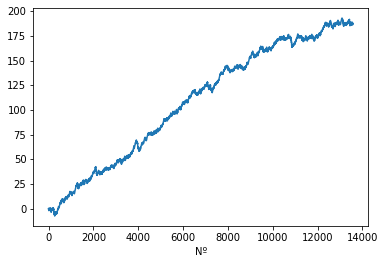

In [32]:
stake = 1
#win_Back = stake * (df1.FT_Odds_Over05 - 1)
win_Back = stake * (0.1)
lose_Back = -stake

df1.loc[(df1['Previsões'] == 1) & (df1['Over05'] == 1), 'Profit'] = win_Back
df1.loc[(df1['Previsões'] == 1) & (df1['Over05'] == 0), 'Profit'] = lose_Back
df1.loc[(df1['Previsões'] == 0) & (df1['Over05'] == 1), 'Profit'] = 0
df1.loc[(df1['Previsões'] == 0) & (df1['Over05'] == 0), 'Profit'] = 0

filtro = df1.Previsões == 1
df0 = df1[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
df0.Profit_acu.tail(1)

In [33]:
ROI = df0.Profit_acu.tail(1)/len(df0)*100
ROI

Nº
13577    1.379539
Name: Profit_acu, dtype: object